In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
path = './data/'
p1= pd.read_csv(path+'users.csv')
p2= pd.read_csv(path+'books.csv')
p3= pd.read_csv(path+'train_ratings.csv')
p4= pd.read_csv(path+'sample_submission.csv')
p5= pd.read_csv(path+'test_ratings.csv') # test와 sample은 완벽하게 동일하다.

#조금 전처리됨
p6= pd.read_csv('/opt/ml/input/code/users_fillna.csv')
p7= pd.read_csv('/opt/ml/input/code/books_fillna_cate.csv') 
p8= pd.read_csv('/opt/ml/input/code/books_lang.csv') 

users  =p6.copy()
books  =p7.copy()
train  =p3.copy()
sample =p4.copy()
test   =p5.copy()

boks =p8.copy()

print('users shape: ', users.shape) 
print(users.columns)#유저id, 지역, 나이
print('books shape: ', books.shape)
print(books.columns)#isbn(책번호), 제목, 저자, 출판년도, 출판사, img주소, 언어, 범주, 요약, img경로
print('train shape: ', train.shape) 
print(train.columns)# 유저 id, 책isbn, 평점

users shape:  (68092, 3)
Index(['user_id', 'age', 'country'], dtype='object')
books shape:  (149570, 9)
Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'language', 'category', 'summary', 'high_category'],
      dtype='object')
train shape:  (306795, 3)
Index(['user_id', 'isbn', 'rating'], dtype='object')


# 국가 결측치 처리

In [2]:
users['country'].value_counts()[60:80]

Series([], Name: country, dtype: int64)

In [3]:
# 내용물을 들여다 보는 코드 이제 자연
(users[users['country'].str.contains('phil') \
	& (users['country'] != 'italy') \
	& (users['country'] != 'games activities') \
	# & (users['country'] != 'performing arts') \
	# & (users['country'].str.contains('dis') == True) \
	# & (users['country'].str.contains('psychology') == False) \
	])\
		# [20:40]
	# .sample(10) \
	# [:20]

,user_id,age,city,state,country
1131,66428,16.0,dasmarias,cavite,phillipines
1280,86809,26.0,manila,metromanila,phillipines
1791,168800,19.0,zamboanga,mindanao,phillipines
3330,224997,NaN,legazpi,albay,phillipines
4206,12100,26.0,quezoncity,nationalcapitalregion,phillipines
5934,88435,19.0,quezoncity,ncr,phillipines
6235,259286,NaN,cebucity,cebu,phillipines
6786,203910,16.0,manila,makati,phillipines
7838,116534,18.0,muntinlupacity,manila,phillipines
8130,264525,17.0,quezoncity,manila,phillipines


In [118]:
# 치환 코드. 처음은 미국

lst = ['hamp']
lst = '|'.join(lst)
#포함하는 단어라면
users['country'].where(users['country'].str.contains(lst)==False, 'unitedkingdom', inplace=True)
#정확히 그 단어면
# users['country'].where((users['country']=='usacurrentlylivinginengland')==False, 'usa', inplace=True)

In [5]:
users['country'].value_counts()


usa              46074
canada            6304
unitedkingdom     3611
germany           3580
australia         1803
spain             1646
france             874
italy              819
newzealand         420
switzerland        409
netherlands        389
portugal           279
austria            266
others             223
malaysia           158
singapore          123
brazil              97
belgium             82
finland             81
sweden              79
argentina           75
mexico              74
japan               68
phillipines         57
denmark             48
ireland             37
southafrica         37
india               35
china               32
norway              28
romania             27
hongkong            25
israel              25
england             23
southkorea          18
poland              17
greece              15
iran                15
slovenia            15
indonesia           14
czechrepublic       12
hungary             10
luxembourg           9
costarica  

In [30]:
#이제 오랜 시간은 그만. 그냥 파일로 저장하자.
!rm /opt/ml/input/code/users_fillna.csv
if not os.path.isfile('/opt/ml/input/code/users_fillna.csv'):
	print('saving')
	users.to_csv('/opt/ml/input/code/users_fillna.csv', index=False)

saving


In [136]:
modify = users[(users['country']=='1')&(users['state'].notnull())]['state'].values
#나라는 없는 주제에 도시는 있는 놈들의 도시의 값들을 저장함.

#value_counts는 해당 series의 고유한 값들을 인덱스로 삼고 갯수를 값으로 가지는 sereis를 반환한다.
location_list = []
for i in modify:
	try:
		#value_counts는 각 고유한 값들의 분포를 나타내준다.
		tmp = users[users['state'].str.contains(i) & users['country'].notnull()]
		city_tmp = tmp['city'].value_counts().index[0]
		state_tmp = tmp['state'].value_counts().index[0]
		country_tmp = tmp['country'].value_counts().index[0]
		location_list.append((city_tmp, state_tmp, country_tmp))
		#
	except: pass

for location in location_list:
    users.loc[users[users['state']==location[1]].index,'country'] = location[2]

In [6]:
users[(users['country'] == '1')]

,user_id,age,city,state,country


In [305]:
# 치환 코드. 처음은 미국

lst = ['usa']
lst = '|'.join(lst)
#포함하는 단어라면
users['country'].where(users['state'].str.contains(lst)==False, 'usa', inplace=True)
#정확히 그 단어면
# users['country'].where((users['city']=='ny')==False, 'usa', inplace=True)

In [311]:
#5개 미만은 others만들어버리기
user_dict = users['country'].value_counts().to_dict()
other_lst = []
for i in user_dict:
	if user_dict[i] <= 5: other_lst.append(i)
users['country'].where(users['country'].isin(other_lst)==False, 'others', inplace=True)


In [7]:
users['country'].value_counts()

usa              46074
canada            6304
unitedkingdom     3611
germany           3580
australia         1803
spain             1646
france             874
italy              819
newzealand         420
switzerland        409
netherlands        389
portugal           279
austria            266
others             223
malaysia           158
singapore          123
brazil              97
belgium             82
finland             81
sweden              79
argentina           75
mexico              74
japan               68
phillipines         57
denmark             48
ireland             37
southafrica         37
india               35
china               32
norway              28
romania             27
hongkong            25
israel              25
england             23
southkorea          18
poland              17
greece              15
iran                15
slovenia            15
indonesia           14
czechrepublic       12
hungary             10
luxembourg           9
costarica  

# 나라 채우기 완료. 일일히 검색해서 도시에 맞는 나라 넣고, 잘못 쓰인 나라와 5개 미만인 나라 others처리

# 이제 나이

In [8]:
age_na = users[users['age'].notna()]['age'].tolist()
age_na

[49.0,
 30.0,
 36.0,
 29.0,
 29.0,
 60.0,
 27.0,
 71.0,
 40.0,
 53.0,
 65.0,
 36.0,
 46.0,
 30.0,
 47.0,
 49.0,
 26.0,
 56.0,
 37.0,
 39.0,
 25.0,
 27.0,
 31.0,
 41.0,
 20.0,
 58.0,
 42.0,
 38.0,
 52.0,
 21.0,
 42.0,
 42.0,
 22.0,
 34.0,
 33.0,
 19.0,
 33.0,
 57.0,
 51.0,
 29.0,
 26.0,
 37.0,
 31.0,
 29.0,
 38.0,
 35.0,
 25.0,
 31.0,
 49.0,
 53.0,
 22.0,
 51.0,
 39.0,
 32.0,
 29.0,
 47.0,
 62.0,
 29.0,
 31.0,
 56.0,
 45.0,
 37.0,
 42.0,
 40.0,
 74.0,
 34.0,
 51.0,
 44.0,
 36.0,
 39.0,
 43.0,
 68.0,
 47.0,
 35.0,
 37.0,
 54.0,
 55.0,
 24.0,
 40.0,
 18.0,
 57.0,
 57.0,
 40.0,
 45.0,
 59.0,
 33.0,
 44.0,
 43.0,
 38.0,
 28.0,
 41.0,
 41.0,
 47.0,
 53.0,
 39.0,
 56.0,
 43.0,
 52.0,
 33.0,
 28.0,
 70.0,
 55.0,
 18.0,
 21.0,
 21.0,
 17.0,
 58.0,
 25.0,
 28.0,
 29.0,
 37.0,
 24.0,
 33.0,
 18.0,
 20.0,
 40.0,
 37.0,
 49.0,
 31.0,
 59.0,
 25.0,
 27.0,
 21.0,
 30.0,
 52.0,
 62.0,
 46.0,
 48.0,
 33.0,
 29.0,
 49.0,
 44.0,
 14.0,
 54.0,
 32.0,
 33.0,
 27.0,
 26.0,
 38.0,
 50.0,
 17.0,
 29.0,
 43.0,

In [11]:
from tqdm import tqdm

for i, j in tqdm(enumerate(users['age'])):
	if np.isnan(j):
		users['age'].iloc[i] = np.random.choice(age_na)


68092it [00:00, 467614.81it/s]


,user_id,age,city,state,country


<BarContainer object of 91 artists>

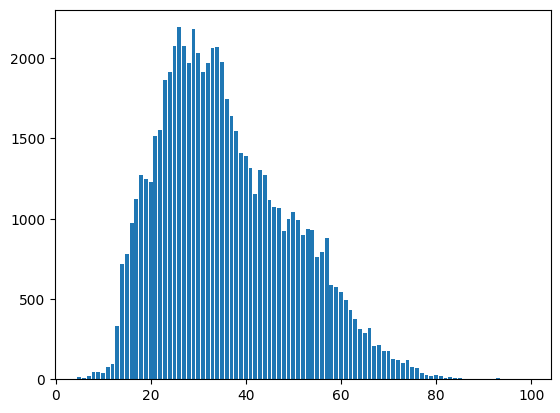

In [12]:
fig, ax = plt.subplots(1,1)

age = users['age'].value_counts().to_dict()
ax.bar(age.keys(), age.values())


In [26]:
users = users.drop(('state'), axis = 1)

In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  68092 non-null  int64  
 1   age      68092 non-null  float64
 2   country  68092 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


# 나이 결측치 보완

In [3]:
train = train.merge(users).merge(books)

0

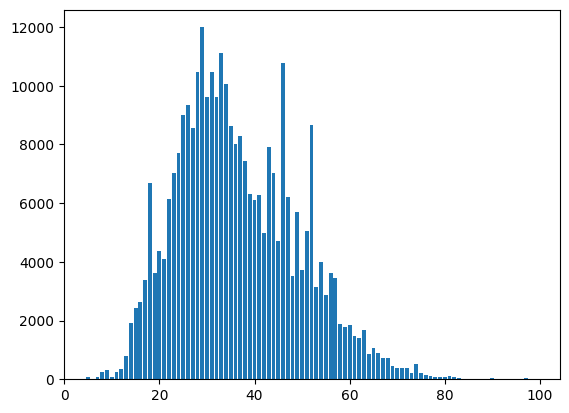

In [4]:
tmp = train['age'].value_counts().to_dict()
fig, ax = plt.subplots(1,1)
ax.bar(tmp.keys(), tmp.values())
len(users[users['age'].isna()]['age'])
#학습셋에서의 나이치. 참고로 지금은 나이 결측치 보완을 위해 나이 결측을 냅두고 진행중이다.

In [6]:
def change_age(x):
	if x < 10: return 0
	elif 10 <= x < 20: return 1
	elif 20 <= x < 30: return 2
	elif 30 <= x < 40: return 3
	elif 40 <= x < 50: return 4
	elif 50 <= x < 60: return 5
	elif 60 <= x < 70: return 6
	elif 70 <= x <= 100: return 7
	else: return np.nan

train['age'] = train['age'].map(change_age)
train['age']

0         2
1         3
2         2
3         3
4         3
         ..
306790    5
306791    7
306792    1
306793    3
306794    6
Name: age, Length: 306795, dtype: int64

In [14]:
train['age'].value_counts()

3.0    66874
2.0    55549
4.0    42891
5.0    27018
1.0    12101
6.0     7275
7.0     1476
0.0      623
8.0      238
9.0       88
Name: age, dtype: int64

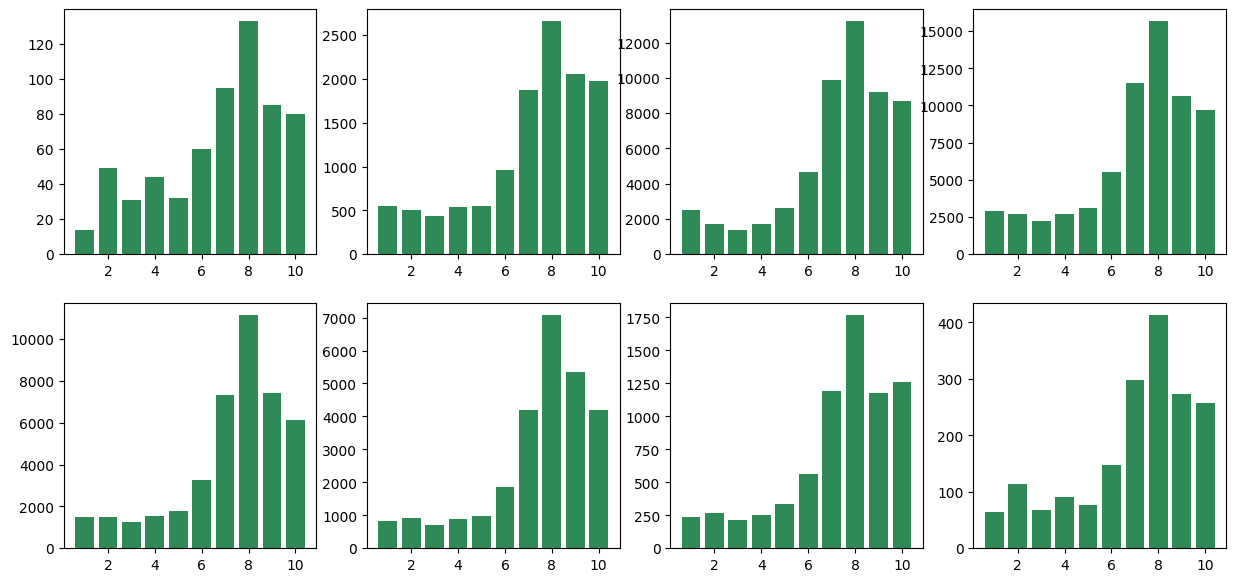

In [34]:
fig, ax = plt.subplots(2,4, figsize=(15,7))
ax = ax.flatten()

for i in range(8):
	tmp = train[train['age'] == i]
	tmp = tmp['rating'].value_counts().to_dict()
	ax[i].bar(tmp.keys(), tmp.values(), color='seagreen')

plt.show()
#전체적인 분포는 비슷해보인다. 

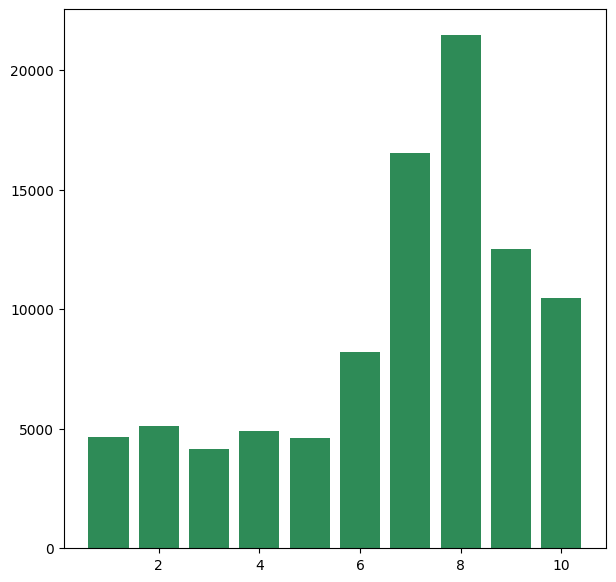

In [38]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax = ax

for i in range(1):
	tmp = train[train['age'].isna()]
	tmp = tmp['rating'].value_counts().to_dict()
	ax.bar(tmp.keys(), tmp.values(), color='seagreen')

plt.show()
#이놈들이 결측된 나이들의 분포이다. 

In [ ]:
fig, ax = plt.subplots(3,5, figsize=(15,7))
ax = ax.flatten()

tmp = train['high_category'].value_counts()
for i in range(8):
	tmp = train[train['age'] == i]
	tmp = tmp['rating'].value_counts().to_dict()
	ax[i].bar(tmp.keys(), tmp.values(), color='seagreen')

plt.show()

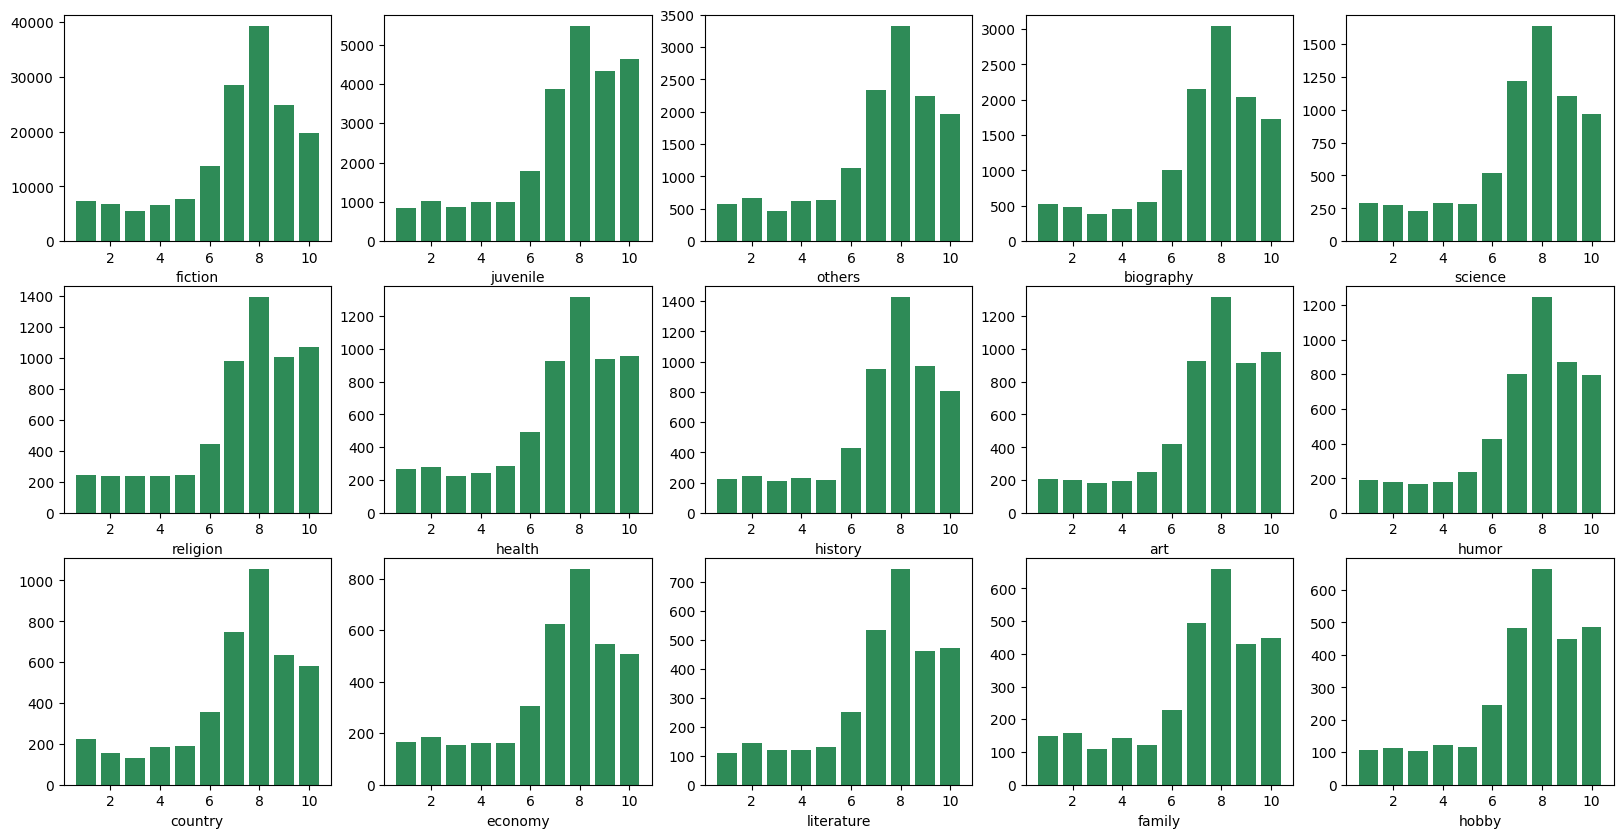

In [61]:
tmp = pd.DataFrame(train['high_category'].value_counts().to_dict().items(), columns=['category', 'count'])
categor = tmp[:15]

fig, ax = plt.subplots(3,5, figsize=(20,10))
ax = ax.flatten()
for i in range(15):
	tmp = train[train['high_category'] == categor.iloc[i][0]]
	tmp = tmp['rating'].value_counts().to_dict()
	ax[i].bar(tmp.keys(), tmp.values(), color='seagreen')
	ax[i].set_xlabel(f'{categor.iloc[i][0]}')

plt.show()

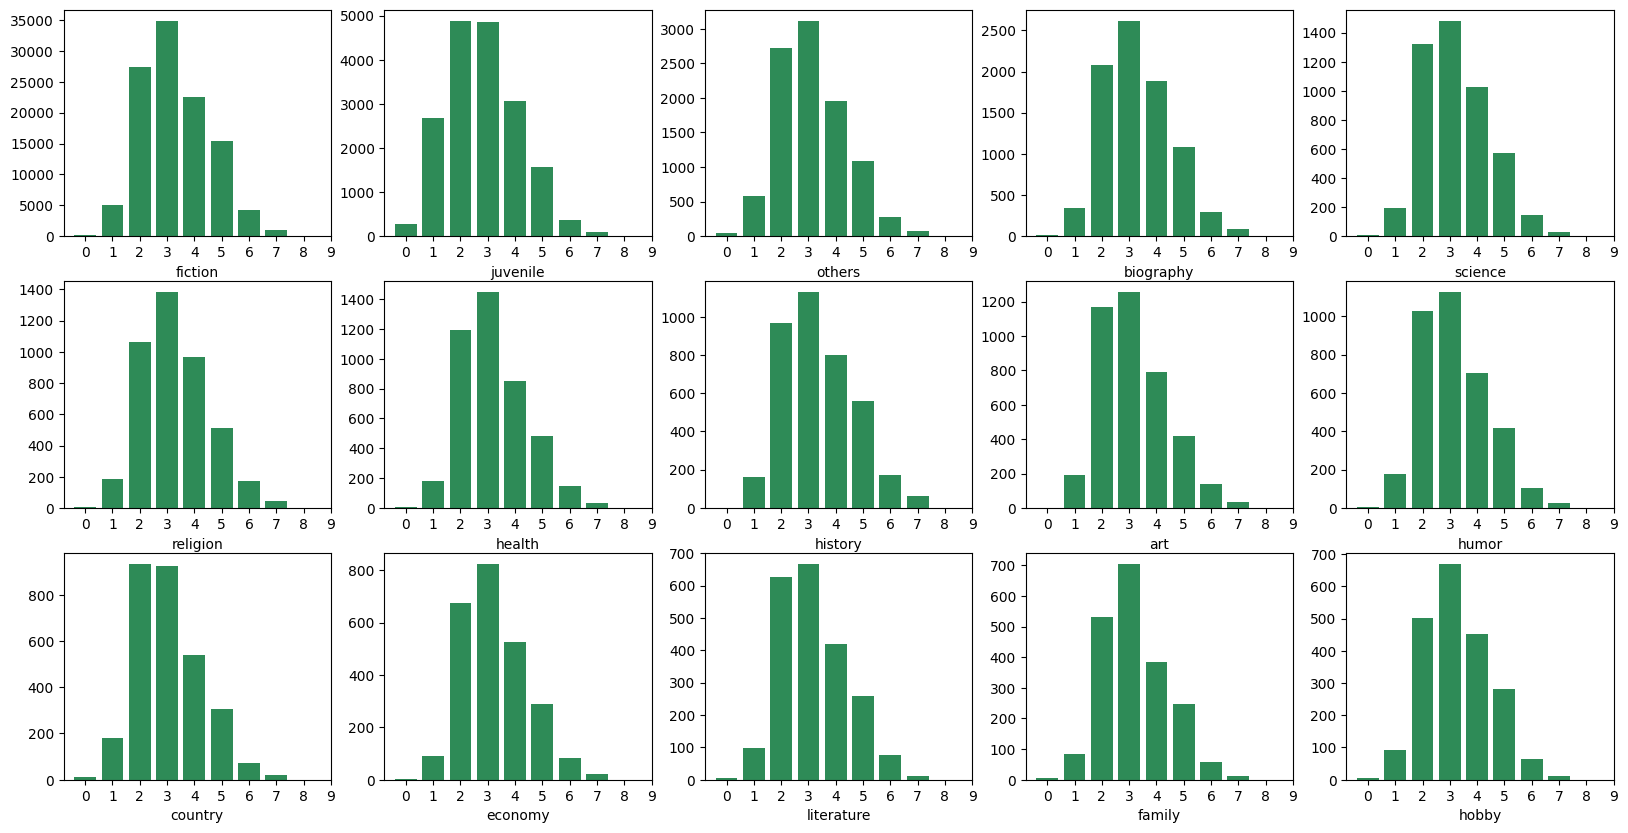

In [64]:
tmp = pd.DataFrame(train['high_category'].value_counts().to_dict().items(), columns=['category', 'count'])
categor = tmp[:15]

fig, ax = plt.subplots(3,5, figsize=(20,10))
ax = ax.flatten()
for i in range(15):
	tmp = train[train['high_category'] == categor.iloc[i][0]]
	tmp = tmp['age'].value_counts().to_dict()
	ax[i].bar(tmp.keys(), tmp.values(), color='seagreen')
	ax[i].set_xlabel(f'{categor.iloc[i][0]}')
	ax[i].set_xticks(np.arange(10))

plt.show()

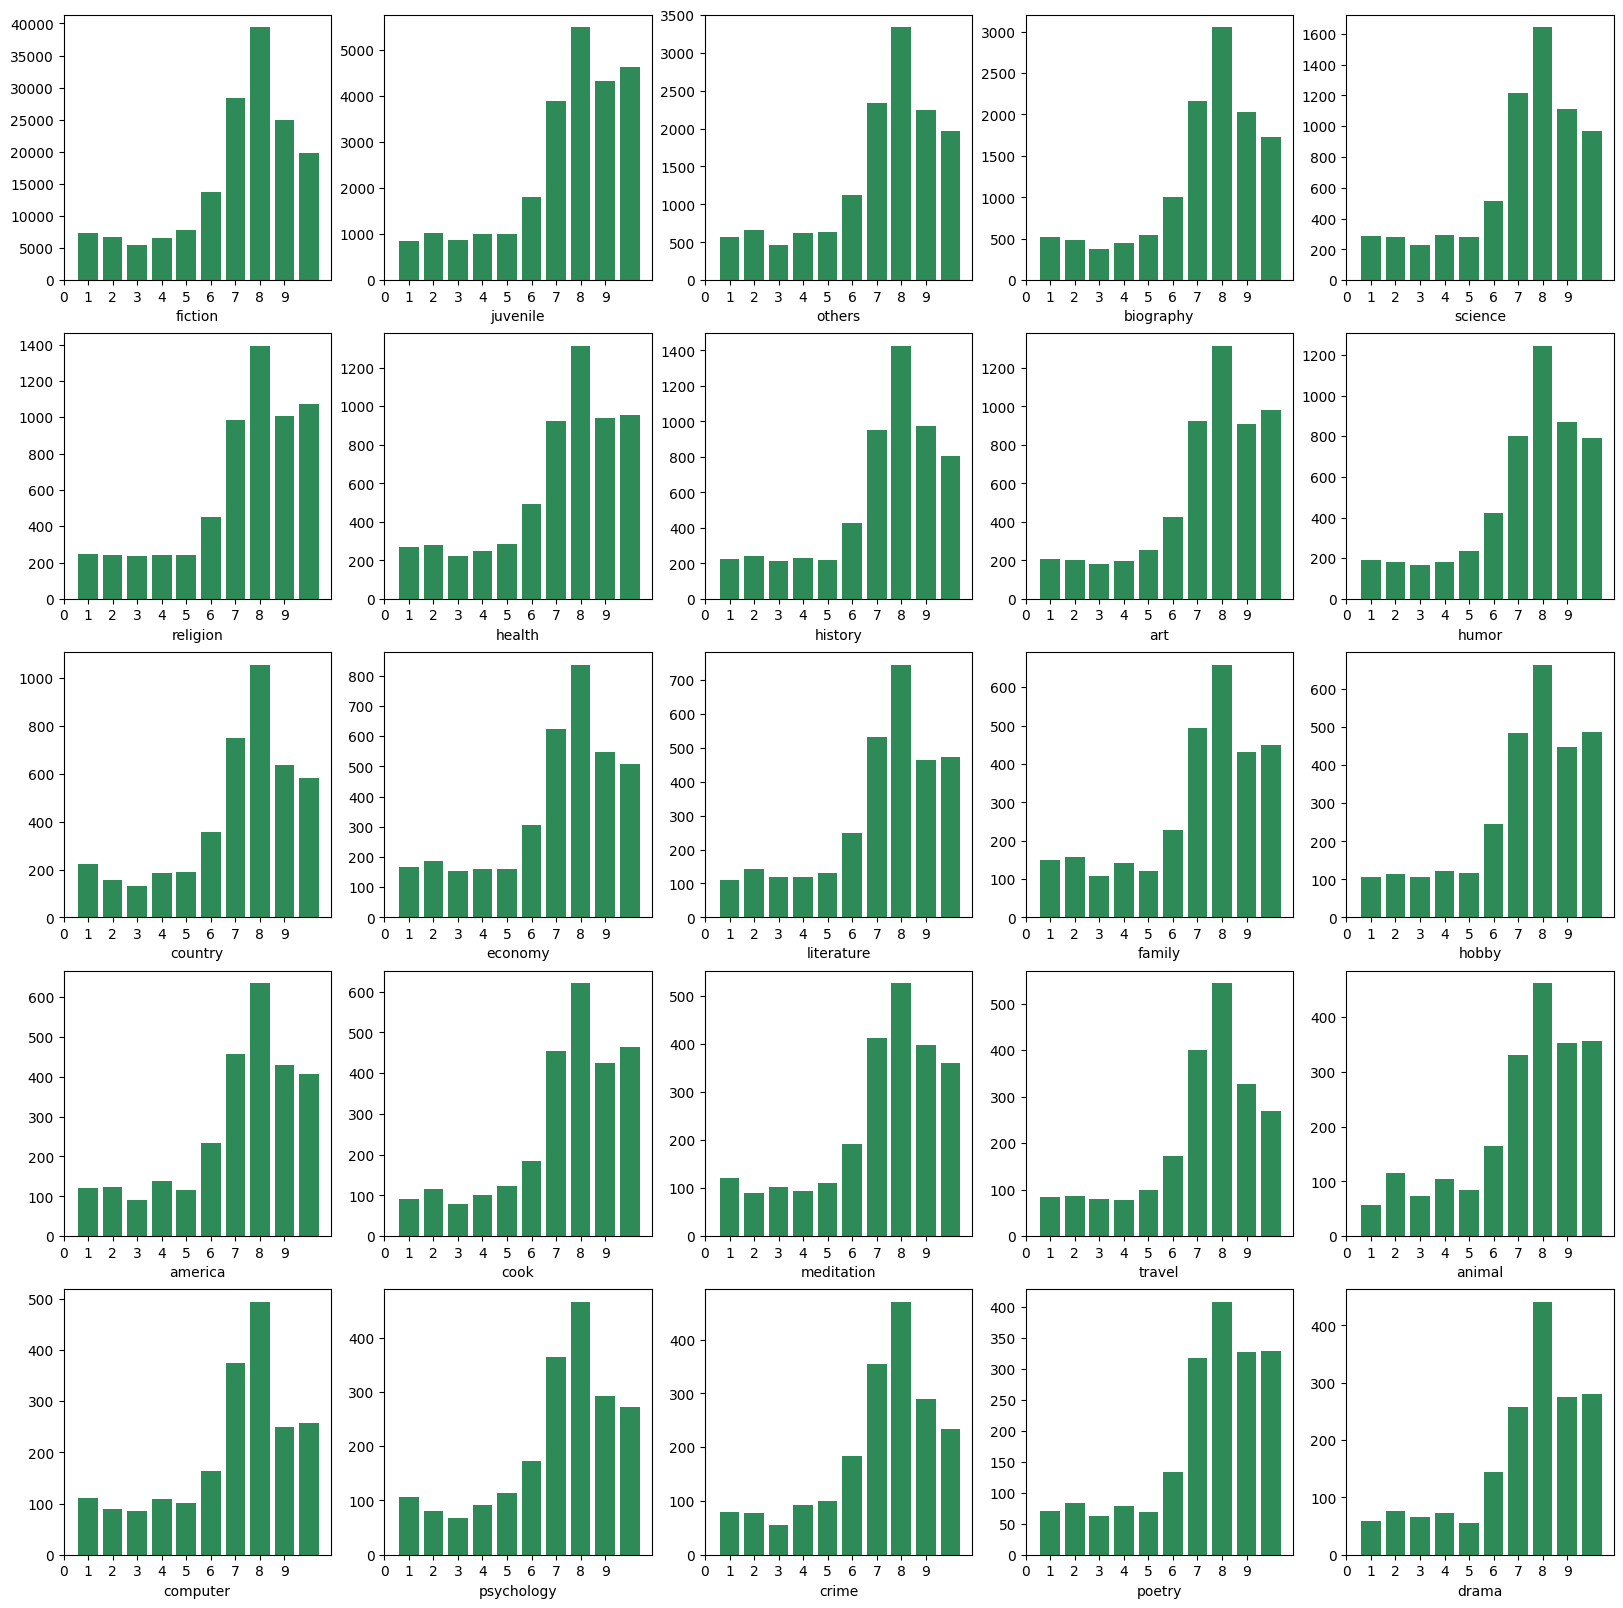

In [8]:
tmp = pd.DataFrame(train['high_category'].value_counts().to_dict().items(), columns=['category', 'count'])
categor = tmp[:25]

fig, ax = plt.subplots(5,5, figsize=(20,20))
ax = ax.flatten()
for i in range(25):
	tmp = train[train['high_category'] == categor.iloc[i][0]]
	tmp = tmp['rating'].value_counts().to_dict()
	ax[i].bar(tmp.keys(), tmp.values(), color='seagreen')
	ax[i].set_xlabel(f'{categor.iloc[i][0]}')
	ax[i].set_xticks(np.arange(10))

plt.show()

In [9]:
train['high_category'].value_counts(1)

fiction                        0.522355
juvenile                       0.080982
others                         0.045597
biography                      0.040281
science                        0.022227
                                 ...   
beauty personal                0.000059
fairies                        0.000059
readers                        0.000049
hollywood los angeles calif    0.000046
bedtime                        0.000042
Name: high_category, Length: 153, dtype: float64

# 나라를 종교권, 대륙권으로 묶어보기

In [19]:
users['country'].unique()

array(['canada', 'usa', 'malaysia', 'newzealand', 'finland', 'england',
       'portugal', 'brazil', 'germany', 'austria', 'france', 'australia',
       'italy', 'netherlands', 'poland', 'others', 'iran', 'spain',
       'singapore', 'argentina', 'india', 'romania', 'mexico',
       'southafrica', 'switzerland', 'phillipines', 'japan', 'china',
       'belgium', 'sweden', 'kuwait', 'indonesia', 'norway', 'greece',
       'denmark', 'czechrepublic', 'venezuela', 'costarica', 'turkey',
       'slovenia', 'hongkong', 'southkorea', 'egypt', 'iceland',
       'pakistan', 'israel', 'hungary', 'luxembourg', 'uruguay'],
      dtype=object)

In [17]:
users['country'].where((users['country'] == 'unitedkingdom')==False, 'england', inplace=True)
users['country'].where((users['country'] == 'ireland')==False, 'england', inplace=True)


In [18]:
users['religion'] = users['country'].copy()

In [25]:
christian = ['usa', 'australia', 'newzealand', 'ireland', 'england', 'canada', 'norway', 'iceland', 'pinland', 'southafrica', 'israel']
catholic = ['portugal', 'brazil', 'germany', 'austria', 'france', 'italy', 'netherlands', 'poland', 'spain',\
			'argentina', 'romania', 'switzerland', 'belgium', 'sweden', 'greece', 'denmark', \
			'czechrepublic', 'venezuela', 'costarica', 'hungary', 'luxembourg', 'slovenia',\
			'uruguay', 'mexico', 'phillipines', 'finland']
islam = ['iran', 'kuwait', 'malaysia', 'pakistan', 'turkey', 'indonesia', 'egypt']
buddism = ['hongkong', 'china', 'japan', 'southkorea', 'singapore']
hindu = ['india']

In [26]:
users['religion'].where(users['religion'].isin(christian) == False, 'christian', inplace=True)
users['religion'].where(users['religion'].isin(catholic) == False, 'christian', inplace=True)
users['religion'].where(users['religion'].isin(islam) == False, 'islam', inplace=True)
users['religion'].where(users['religion'].isin(buddism) == False, 'buddism', inplace=True)
users['religion'].where(users['religion'].isin(hindu) == False, 'hindu', inplace=True)

In [27]:
users['religion'].value_counts()

christian    67353
buddism        266
others         223
islam          215
hindu           35
Name: religion, dtype: int64

In [28]:
users['continent'] = users['country'].copy()

In [30]:
n_america = ['usa', 'canada']
s_america = ['brazil','argentina','czechrepublic', 'venezuela', 'costarica', 'uruguay', 'mexico']
europe    = ['england', 'norway', 'iceland', 'pinland', 'portugal',  'germany', 'austria', 'france', 'italy', 'netherlands', 'poland', 'spain',\
			'romania', 'switzerland', 'belgium', 'sweden', 'greece', 'denmark', 'hungary', 'luxembourg', 'slovenia', 'finland']
islam     = ['iran', 'kuwait', 'malaysia', 'pakistan', 'turkey', 'egypt', 'israel']
africa    = ['southafrica']
e_asia    = ['hongkong', 'china', 'japan', 'southkorea']
en_asia   = ['phillipines', 'indonesia', 'singapore']
inida     = ['india']
ause      = ['australia', 'newzealand']

In [31]:
users['continent'].where(users['continent'].isin(n_america) == False, 'n_america', inplace=True)
users['continent'].where(users['continent'].isin(s_america) == False, 's_america', inplace=True)
users['continent'].where(users['continent'].isin(europe) == False, 'europe', inplace=True)
users['continent'].where(users['continent'].isin(islam) == False, 'islam', inplace=True)
users['continent'].where(users['continent'].isin(inida) == False, 'inida', inplace=True)
users['continent'].where(users['continent'].isin(africa) == False, 'africa', inplace=True)
users['continent'].where(users['continent'].isin(e_asia) == False, 'e_asia', inplace=True)
users['continent'].where(users['continent'].isin(en_asia) == False, 'en_asia', inplace=True)
users['continent'].where(users['continent'].isin(ause) == False, 'ause', inplace=True)

In [32]:
users['continent'].value_counts()

n_america    52378
europe       12352
ause          2223
s_america      281
islam          226
others         223
en_asia        194
e_asia         143
africa          37
inida           35
Name: continent, dtype: int64

In [33]:
#이제 오랜 시간은 그만. 그냥 파일로 저장하자.
# !rm /opt/ml/input/code/users_fillna.csv
if not os.path.isfile('/opt/ml/input/code/users_conreli.csv'):
	print('saving')
	users.to_csv('/opt/ml/input/code/users_conreli.csv', index=False)

saving
